### Clustering Method Exploration: Analyzing Relationships Between Interviewed and Non-interviewed Customers

#### Project Overview
In this solo data science project, I explore clustering methods using a dataset of 200 customers, where 10 have undergone in-depth discovery interviews. My aim is to discover patterns and similarities between the interviewed and non-interviewed customers, enhancing my understanding of diverse customer needs.

#### Objectives
- **Uncover Similarities:** Utilizing clustering algorithms to unearth patterns in customer behavior and preferences.
- **Extrapolate Interview Insights:** Applying insights from the interviews to gain a deeper understanding of the entire customer base, on an individual basis.
- **Enhance Personal Learning:** This project serves as a means to improve my skills in delivering data-driven insights, focusing on customers who have not been interviewed.

#### Approach
The project involves a detailed analysis of customer data, using clustering techniques to categorize customers based on various attributes. This individual exploration aims to reveal how non-interviewed customers resemble those interviewed, enhancing my personal understanding and application of data science methods.

#### Data Source
The data, sourced from [Kaggle](https://www.kaggle.com/datasets/shrutimechlearn/customer-data), encompasses 200 data points with features such as:
- **CustomerID:** IDs ranging from 1 to 200.
- **Gender:** Includes 56% Female and 44% Male customers.
- **Age:** Customer ages between 18 and 70 years.
- **Annual Income:** Ranging from $15,000 to $137,000.
- **Spending Score:** Scores between 1 and 99, indicating purchasing behavior.

This project is a personal venture to delve into data science methodologies, focusing on clustering techniques.


In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances 
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.cluster import KMeans



# Set seed
np.random.seed(42)

# Import data
data_path = 'data/Mall_Customers.csv'
data = pd.read_csv(data_path)

In [2]:
# Format and clean data
data = data.drop(columns=['CustomerID'])
data = data.rename(columns={'Genre': 'Gender'})
data.columns = data.columns.str.lower()
data['gender'] = data['gender'].astype('category')

df = data.copy()

In [3]:
# Normalize Data
df[['age', 'annual_income_(k$)', 'spending_score']] = MinMaxScaler().fit_transform(data[['age', 'annual_income_(k$)', 'spending_score']])
df['gender'] = df['gender'].cat.codes

In [4]:
# Calculate Euclidean Distances between all points
df_distances = euclidean_distances(df, df)

In [5]:
# Add distances to dataframe
distance_columns = [f'distance_to_{i}' for i in range(len(df))]
df_distances = pd.DataFrame(df_distances, columns=distance_columns, index=df.index)

# Concatinate distances to original dataframe
df = pd.concat([df, df_distances], axis=1)

In [6]:
# Select 10 random customers as "interviewed" 
interviewed_indices = np.random.choice(df.index, size=10, replace=False)

In [7]:
# Extract distances to interviewed customers
interviewed_distances = df_distances[[f'distance_to_{i}' for i in interviewed_indices]]

# Identify nearest interviewed customer for each non-interviewed customer
nearest_interviewed = interviewed_distances.idxmin(axis=1).value_counts()

/var/folders/0r/6jbjzk0n44n_phz8hy1gvsp80000gn/T/ipykernel_25426/431310269.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


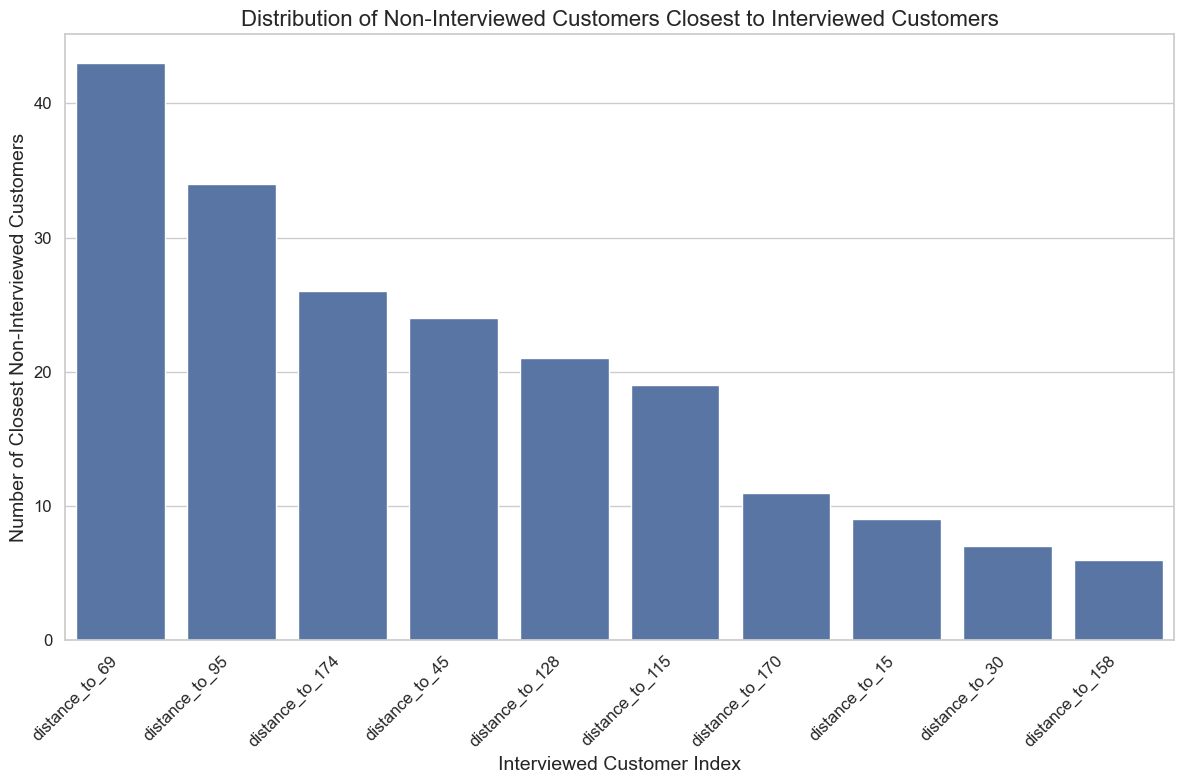

In [9]:
# Create a histogram
sns.set(style="whitegrid")

# Increase the figure size
plt.figure(figsize=(12, 8))

# Create the barplot
ax = sns.barplot(x=nearest_interviewed.index, y=nearest_interviewed.values)

# Rotate the x-axis labels to prevent overlapping
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Optionally adjust the font size of the labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set the labels and title
plt.xlabel('Interviewed Customer Index', fontsize=14)
plt.ylabel('Number of Closest Non-Interviewed Customers', fontsize=14)
plt.title('Distribution of Non-Interviewed Customers Closest to Interviewed Customers', fontsize=16)

# Show the plot with adjusted labels
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

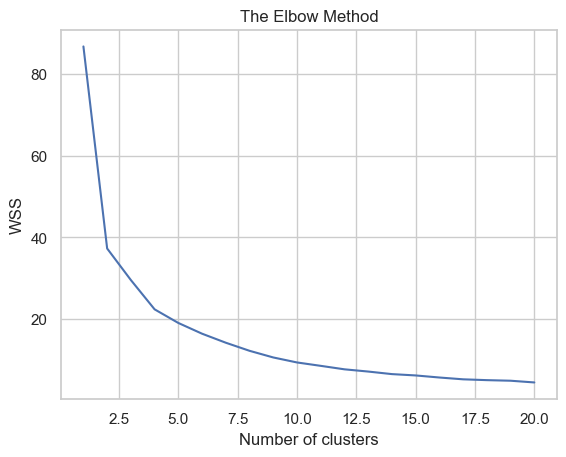

In [10]:
# Apply elbow method to determine optimal number of clusters for KMeans of the entire dataset
features = df[['gender', 'age', 'annual_income_(k$)', 'spending_score']]

# Calculate WSS for a range of K values
wss = []
for i in range(1, 21):  
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.plot(range(1, 21), wss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')  # Within-cluster sum of squares
plt.show()

For n_clusters = 2, the average silhouette_score is : 0.5194624832665107
For n_clusters = 3, the average silhouette_score is : 0.4583525581125425
For n_clusters = 4, the average silhouette_score is : 0.36416575223390624
For n_clusters = 5, the average silhouette_score is : 0.3722192265604816
For n_clusters = 6, the average silhouette_score is : 0.3773792051558326
For n_clusters = 7, the average silhouette_score is : 0.38382882420184655
For n_clusters = 8, the average silhouette_score is : 0.3914361306636702
For n_clusters = 9, the average silhouette_score is : 0.417354299255399
For n_clusters = 10, the average silhouette_score is : 0.43237265473772113
For n_clusters = 11, the average silhouette_score is : 0.4188792443431677
For n_clusters = 12, the average silhouette_score is : 0.4275968943696941
For n_clusters = 13, the average silhouette_score is : 0.42344827336978796
For n_clusters = 14, the average silhouette_score is : 0.42211368942961364
For n_clusters = 15, the average silhouett

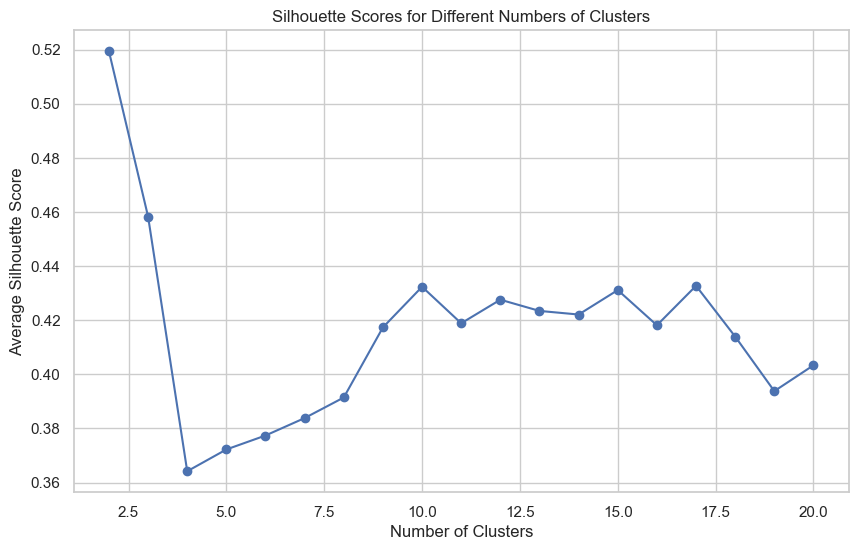

In [11]:
# Test range of clusters for silhouette score
range_n_clusters = list(range(2, 21))  

silhouette_avg_scores = []
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = clusterer.fit_predict(features)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(features, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.show()

In [12]:
# Apply Kmeans to features = df[['gender', 'age', 'annual_income_(k$)', 'spending_score']]
optimal_clusters = 10
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(features)

# Add the cluster labels as a new column to DataFrame
df['cluster'] = cluster_labels

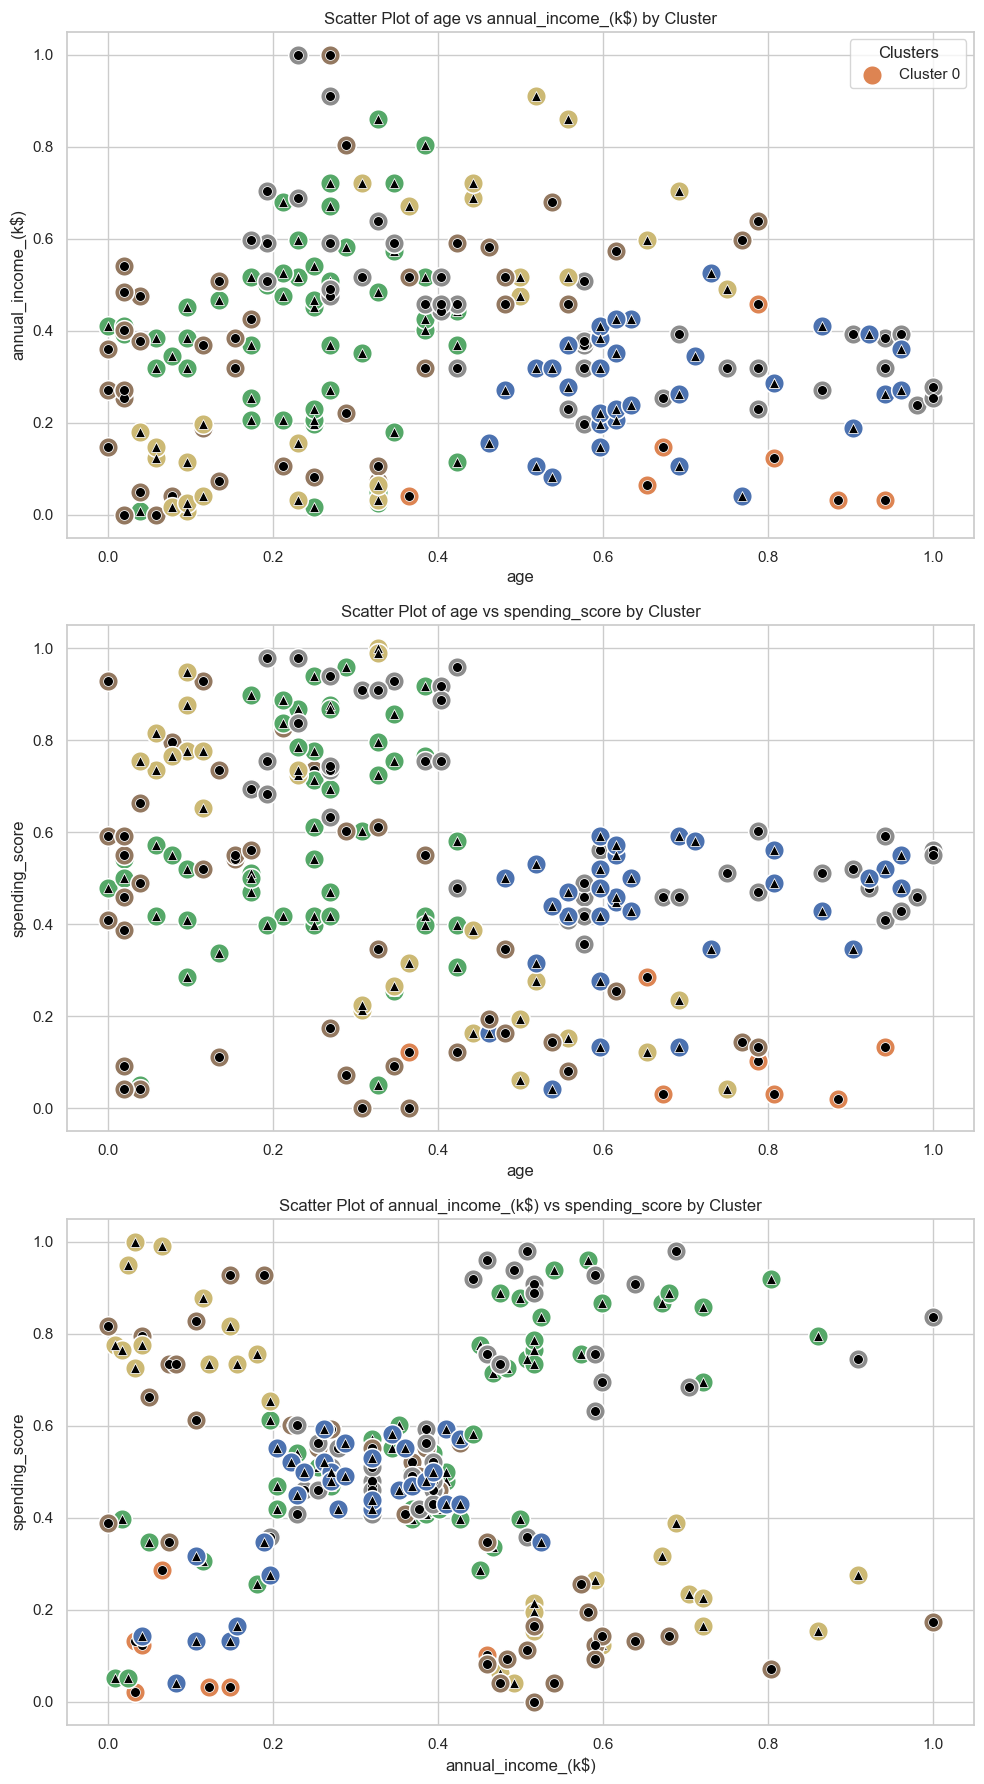

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 3x1 grid for subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# List of feature combinations
combinations = [('age', 'annual_income_(k$)'), ('age', 'spending_score'), ('annual_income_(k$)', 'spending_score')]

# Iterate through each subplot
for i, combination in enumerate(combinations):
    ax = axes[i]
    for cluster in range(n_clusters):
        cluster_data = df[df['cluster'] == cluster]

        # Plot larger, colored markers for each gender
        sns.scatterplot(ax=ax, data=cluster_data[cluster_data['gender'] == 0], x=combination[0], y=combination[1], s=200, label=f'Cluster {cluster}' if cluster == 0 else None)
        sns.scatterplot(ax=ax, data=cluster_data[cluster_data['gender'] == 1], x=combination[0], y=combination[1], s=200, label=f'Cluster {cluster}' if cluster == 0 and i == 0 else None)
        
        # Overlay smaller, black markers for gender differentiation without labels
        sns.scatterplot(ax=ax, data=cluster_data[cluster_data['gender'] == 0], x=combination[0], y=combination[1], marker='^', color='black', s=50, label='_nolegend_')
        sns.scatterplot(ax=ax, data=cluster_data[cluster_data['gender'] == 1], x=combination[0], y=combination[1], marker='o', color='black', s=50, label='_nolegend_')
    
    ax.set_title(f'Scatter Plot of {combination[0]} vs {combination[1]} by Cluster')
    ax.set_xlabel(combination[0])
    ax.set_ylabel(combination[1])
    
    # Only add the legend to the first subplot
    if i == 0:
        ax.legend(title='Clusters')

# Adjust layout
plt.tight_layout()
plt.show()


In [14]:
# Group by cluster and gender, and count the number of data points in each group
gender_distribution = df.groupby(['cluster', 'gender']).size().unstack(fill_value=0)

# Display the gender distribution in each cluster
print(gender_distribution)


gender    0   1
cluster        
0         0   7
1        30   0
2         0  23
3         0  22
4        14   0
5        33   0
6        22   0
7         0  18
8         0  18
9        13   0


It seems that gender is a key determiner in setting the clusers.

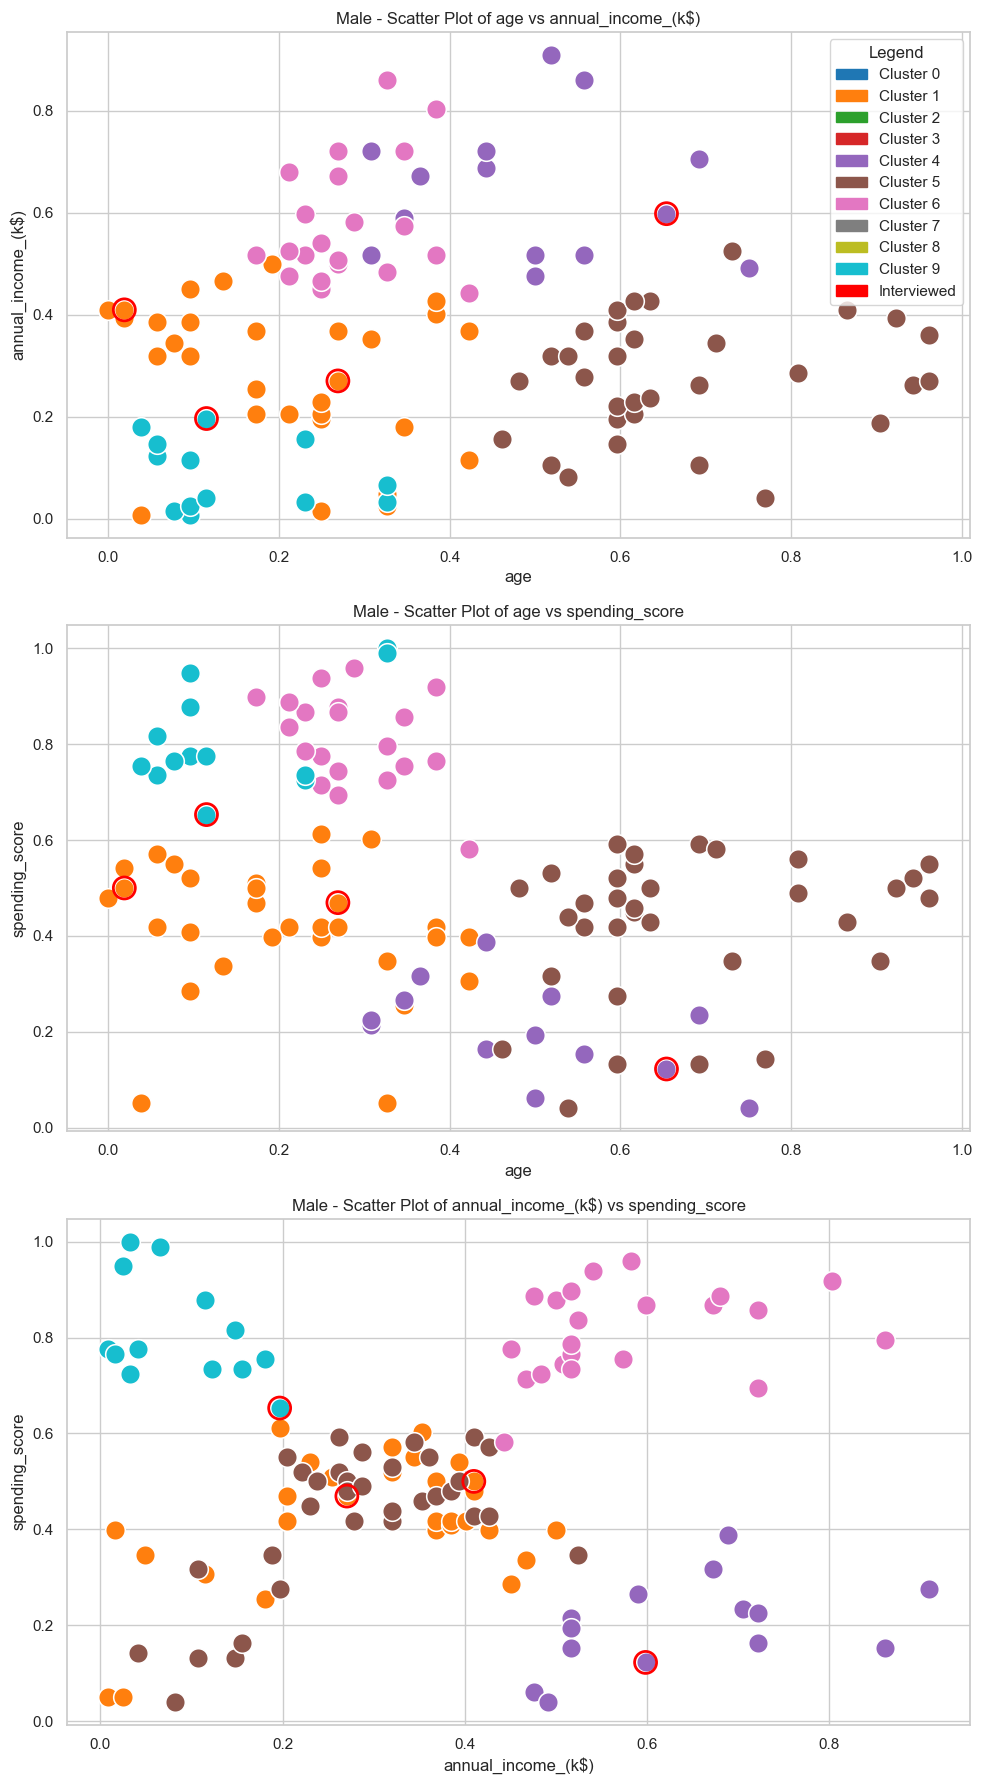

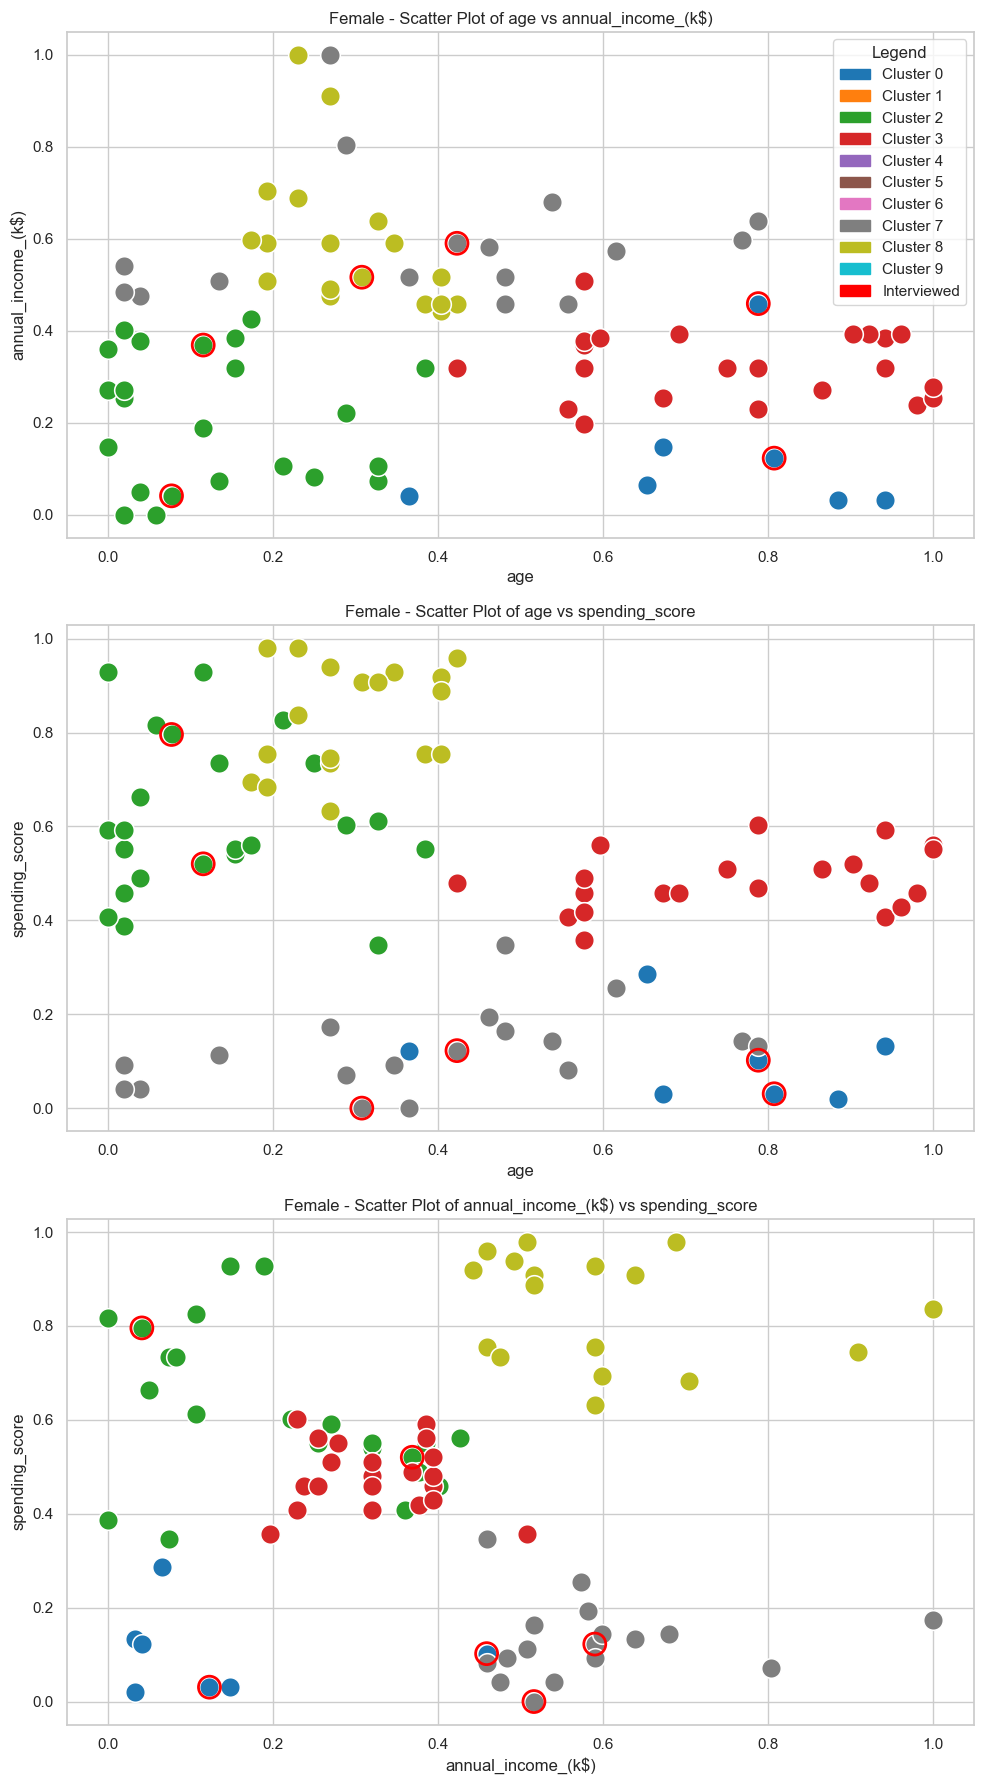

In [15]:
# Split the plots between male and femal to better visualize the relationships between groups

# Generate a list of distinct colors for the optimal number of clusters
colors = sns.color_palette("tab10", optimal_clusters)

# Create a dictionary mapping cluster number to color
cluster_colors = {i: colors[i] for i in range(optimal_clusters)}

# Assign colors to clusters in the dataframe
df['cluster_color'] = df['cluster'].map(cluster_colors)

# List of feature combinations
combinations = [('age', 'annual_income_(k$)'), ('age', 'spending_score'), ('annual_income_(k$)', 'spending_score')]

# Function to create scatter plots with a proper legend
def create_plots(df, gender_title):
    fig, axes = plt.subplots(3, 1, figsize=(10, 18))
    for i, combination in enumerate(combinations):
        ax = axes[i]

        # Plot for each data point using the assigned colors
        for cluster, color in cluster_colors.items():
            cluster_data = df[df['cluster'] == cluster]
            sns.scatterplot(ax=ax, data=cluster_data, x=combination[0], y=combination[1], s=200, color=color, label=f'Cluster {cluster}' if i == 0 else None)

        # Overlay the interviewed data points
        interviewed_data = df.loc[df.index.isin(interviewed_indices)]
        sns.scatterplot(ax=ax, data=interviewed_data, x=combination[0], y=combination[1], facecolors='none', edgecolor='red', linewidth=2, s=250, label='Interviewed' if i == 0 else None, marker='o')

        ax.set_title(f'{gender_title} - Scatter Plot of {combination[0]} vs {combination[1]}')
        ax.set_xlabel(combination[0])
        ax.set_ylabel(combination[1])

        # Create custom legend
        if i == 0:
            legend_patches = [mpatches.Patch(color=color, label=f'Cluster {cluster}') for cluster, color in cluster_colors.items()]
            legend_patches.append(mpatches.Patch(color='red', label='Interviewed'))
            ax.legend(handles=legend_patches, title='Legend')

    plt.tight_layout()
    plt.show()

# Create plots for each gender
create_plots(df[df['gender'] == 0], 'Male')
create_plots(df[df['gender'] == 1], 'Female')

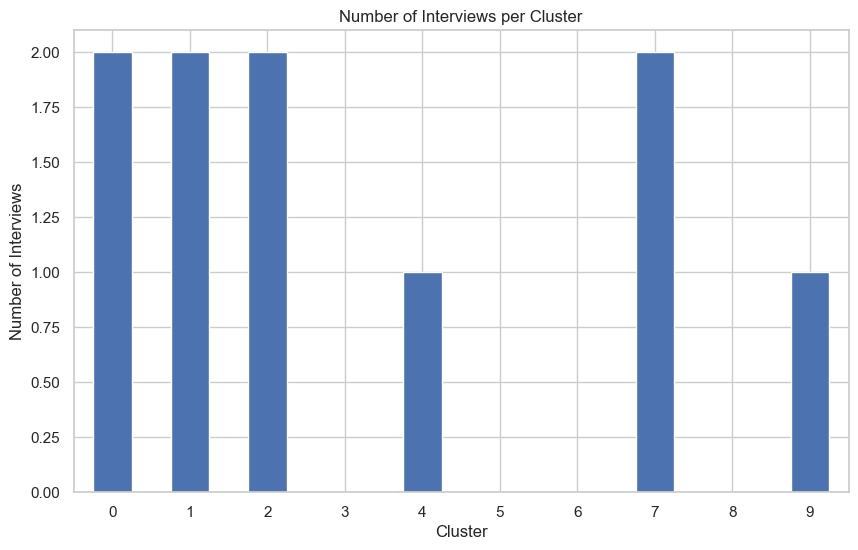

In [21]:
# Understanding the distribution of the interviewed customers across the clusters.

interviewed_clusters = df.loc[interviewed_indices, 'cluster']

# Count the number of interviews in each cluster
interview_counts = interviewed_clusters.value_counts()

# Ensure all clusters are represented, even those with zero interviews
all_clusters = pd.Series(index=range(optimal_clusters), dtype=int).fillna(0)
interview_counts = all_clusters.add(interview_counts, fill_value=0).astype(int)

# Create a bar plot of the number of interviews per cluster
plt.figure(figsize=(10, 6))
interview_counts.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Interviews')
plt.title('Number of Interviews per Cluster')
plt.xticks(rotation=0)
plt.show()

In [19]:
# Understand which data point is most representative of each cluster. 

# Retrieve the cluster centers
cluster_centers = kmeans.cluster_centers_

# Calculate the closest data points to each cluster center
closest, _ = pairwise_distances_argmin_min(cluster_centers, features)

# Create a dictionary mapping each cluster to its closest data point
closest_points = {cluster: point for cluster, point in enumerate(closest)}